In [4]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [5]:
import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLALchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [7]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [9]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Bonus Challenge Assignment: Temperature Analysis II

In [13]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).all()

# For example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [19]:
# Use the function `calc_temps` to calculate the tmin, tavg, and tmax 
# for a year in the data set
last_year = calc_temps('2017-08-01', '2017-08-07')
print(last_year)

[(72.0, 79.25, 83.0)]


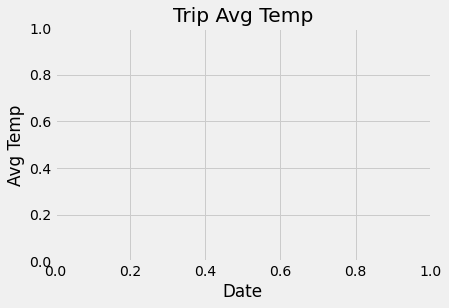

In [58]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for bar height (y value)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
df = pd.DataFrame(last_year)
yerr = (tmax, tmin)

df.plot
#final formatting
plt.title("Trip Avg Temp")
plt.xlabel("Date")
plt.ylabel("Avg Temp")
plt.show()

### Daily Rainfall Average

In [93]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's 
# matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

rainfall = session.query(station.station, station.name, station.latitude, station.longitude, station.elevation, measurement.prcp).filter(func.strftime("%Y-%m-%d", measurement.date.between('2017-08-01', '2017-08-07'))).filter(measurement.prcp >= 1).all()
rain_df = pd.DataFrame(rainfall, columns=['Station Id', 'Name', 'Lat', 'Lng', 'Elevation', 'Rainfall'])
rain_df = rain_df.sort_values("Rainfall", ascending=False)
rain_df

,Station Id,Name,Lat,Lng,Elevation,Rainfall
1088,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,11.53
1080,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,11.53
1086,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,11.53
1085,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,11.53
1084,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6,11.53
...,...,...,...,...,...,...
1468,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,1.00
1467,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,1.00
4310,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,1.00
3572,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,1.00


In [86]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", measurement.date) == date).all()

# For example
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [115]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = '2017-08-01'
end_date = '2017-08-07'

# Use the start and end date to create a range of dates
date_rng = session.query(measurement.date).filter(measurement.date >= start_date).filter(measurement.date <= end_date).distinct().all()
date_rng
# Strip off the year and save a list of strings in the format %m-%d

# Use the `daily_normals` function to calculate the normals for each date string 
# and append the results to a list called `normals`.




[('2017-08-01',),
 ('2017-08-02',),
 ('2017-08-03',),
 ('2017-08-04',),
 ('2017-08-05',),
 ('2017-08-06',),
 ('2017-08-07',)]

In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`


## Close Session

In [ ]:
session.close()